In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
from IPython.core.display import display, HTML

csv_1 = "./csv/status_of_cases.csv"
csv_2 = "./csv/status_of_cases_v2.csv"
def get_status():
    df1 = pd.read_csv(csv_1).set_index('last_update').rename(columns={'positive_confirmed':'number_of_cases'})
    df2 = pd.read_csv(csv_2).set_index('last_update')
    df = pd.concat([df1, df2], sort=False)
    df.index = pd.to_datetime(df.index)
    df['weekday'] = df.index.map(lambda x: x.weekday())
    return df

# Weekly fluctuation

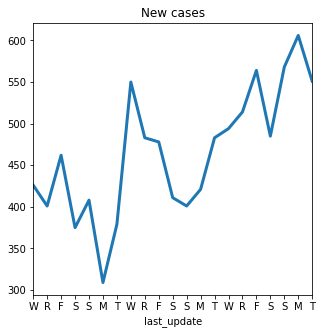

In [77]:
start_date = '2020-04-01'
days = "MTWRFSS"
df = get_status()
df['new_cases'] = df.number_of_cases.diff()
df = df.loc[start_date:]
labels = [days[i] for i in df.weekday]
pl.figure(figsize=(5, 5))
ax = pl.gca();
df.new_cases.fillna(0).plot(ax=ax, linewidth=3);
pl.xticks(df.index, labels);
pl.title('New cases');

array([18353, 18373])

# Comparison between Ontario and Sweden

In [9]:
df = pd.DataFrame({
    'Sweden': [10.23, 14777, 1580, 563],
    'Ontario': [14.57, 11185, 584, 568]
}, index=['Population (millions)', 'Total Covid cases', 'Deaths', 'Daily increase (April 19)']).astype(int)
df

,Sweden,Ontario
Population (millions),10,14
Total Covid cases,14777,11185
Deaths,1580,584
Daily increase (April 19),563,568


In [11]:
df = df.T
df['Deaths'] / df['Total Covid cases']

Sweden     0.106923
Ontario    0.052213
dtype: float64

# Logistic Growth

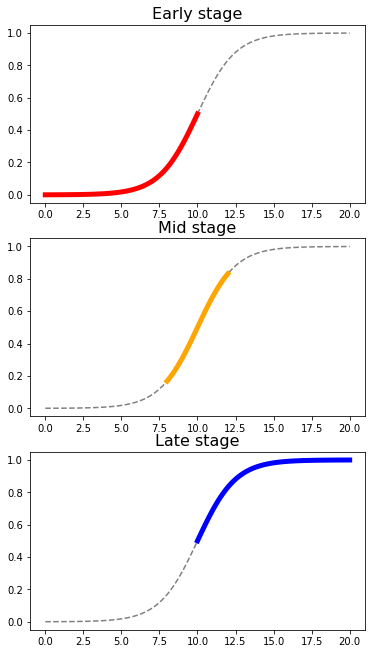

In [2]:
def y(t):
    return 1/(1+np.exp(-0.8*(t-10)))
fig = pl.figure(figsize=(6,6))
fontsize=16
w = 5
t0 = np.linspace(0, 20, 100)

pl.subplot(3,1,1)
t = np.linspace(0, 10, 100)
pl.plot(t0, y(t0), '--', color='gray')
pl.plot(t, y(t), linewidth=w, color='red');
pl.title('Early stage', fontsize=fontsize);
fig.subplots_adjust(bottom=-.4, top=1.0)

pl.subplot(3,1,2)
t = np.linspace(8, 12, 100)
pl.plot(t0, y(t0), '--', color='gray')
pl.plot(t, y(t), linewidth=w, color='orange');
pl.title('Mid stage', fontsize=fontsize);

pl.subplot(3,1,3)
t = np.linspace(10, 20, 100)
pl.plot(t0, y(t0), '--', color='gray')
pl.plot(t, y(t), linewidth=w, color='blue');
pl.title('Late stage', fontsize=fontsize);